In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from Functions import *
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [24]:
axetris_path = '../../../KU/Bachelor+Research/Data/Axetris/Own setup/'

axetris_exp = read_data_exp(axetris_path)

axetris_idx_exp = np.array([[7083, -1], [0, -1]])
axetris_keys = ['test_exp1_21032024', 'test_exp2_21032024']

pd.options.mode.chained_assignment = None 
axetris_exp_treat = dict_for_treatment(axetris_exp, axetris_idx_exp, axetris_keys)

In [22]:
def plot(ax, df):
    ax.plot(df['Minutes'], df['CH4 [ppm]'], lw = 1)
    
    ax.set(xlabel = 'Time / min', ylabel = 'CH4 concentration / ppm')
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.yaxis.offsetText.set_fontsize(9)

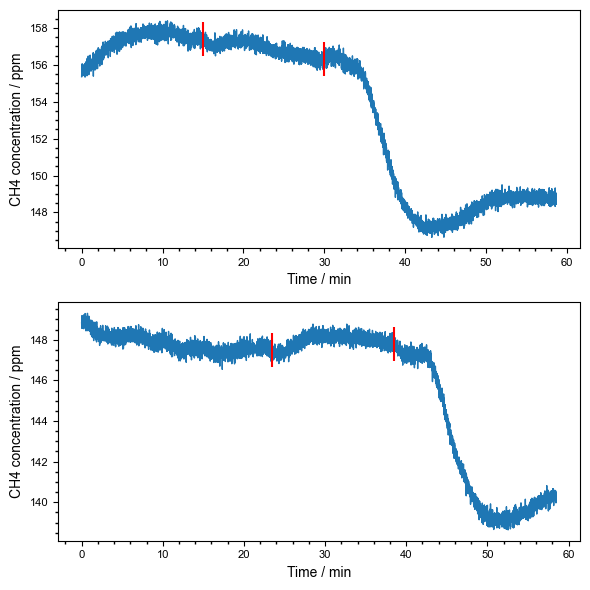

In [40]:
fig, ax = plt.subplots(2,1, figsize = (6, 6))

plot(ax[0], axetris_exp_treat['test_exp1_21032024'])
ax[0].scatter(900/60, 157.4, color = 'r', s = 600, zorder = 10, marker = '|')
ax[0].scatter(900/60 + 15, 156.3, color = 'r', s = 600, zorder = 10, marker = '|')

plot(ax[1], axetris_exp_treat['test_exp2_21032024'])
end = max(axetris_exp_treat['test_exp2_21032024']['Minutes'])
ax[1].scatter(end - 20, 147.8, color = 'r', s = 600, zorder = 10, marker = '|')
ax[1].scatter(end - 35, 147.5, color = 'r', s = 600, zorder = 10, marker = '|')

fig.tight_layout()
fig.savefig('test_exp.png', dpi = 600)
plt.show()